In [1]:
!which python

/Users/surya/Library/Caches/pypoetry/virtualenvs/powr-NZLclV9x-py3.10/bin/python


In [2]:
# importing bunch of libraries all in one go for analysis & mpl fig sizes
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (16, 12)
mpl.rcParams['axes.grid'] = False

2022-11-08 22:51:07.911151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv('data/clean/data.csv', parse_dates=['CREATED_AT'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75478 entries, 0 to 75477
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   CREATED_AT  75478 non-null  datetime64[ns, UTC]
 1   VALUE       75478 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 1.2 MB


In [5]:
df

,CREATED_AT,VALUE
0,2022-03-01 00:01:00+00:00,1889.741211
1,2022-03-01 00:06:00+00:00,1886.260742
2,2022-03-01 00:11:00+00:00,1888.308594
3,2022-03-01 00:16:00+00:00,1873.037109
4,2022-03-01 00:21:00+00:00,1863.653320
...,...,...
75473,2022-10-24 23:36:00+00:00,118.231399
75474,2022-10-24 23:41:00+00:00,194.981689
75475,2022-10-24 23:46:00+00:00,191.545715
75476,2022-10-24 23:51:00+00:00,208.008789


## Data Time Sampling Analysis

There are duplicates

In [6]:
df.CREATED_AT.value_counts()

2022-07-11 09:51:00+00:00    3
2022-07-04 19:46:00+00:00    3
2022-07-22 09:46:00+00:00    3
2022-07-04 09:46:00+00:00    3
2022-07-07 19:46:00+00:00    3
                            ..
2022-05-19 00:51:00+00:00    1
2022-05-19 00:56:00+00:00    1
2022-05-19 01:01:00+00:00    1
2022-05-19 01:06:00+00:00    1
2022-10-24 23:56:00+00:00    1
Name: CREATED_AT, Length: 66973, dtype: int64

In [7]:
df.loc[df['CREATED_AT'] == '2022-07-11 09:51:00+00:00']

,CREATED_AT,VALUE
40347,2022-07-11 09:51:00+00:00,0.000000
40348,2022-07-11 09:51:00+00:00,468.000000
40349,2022-07-11 09:51:00+00:00,497.836426


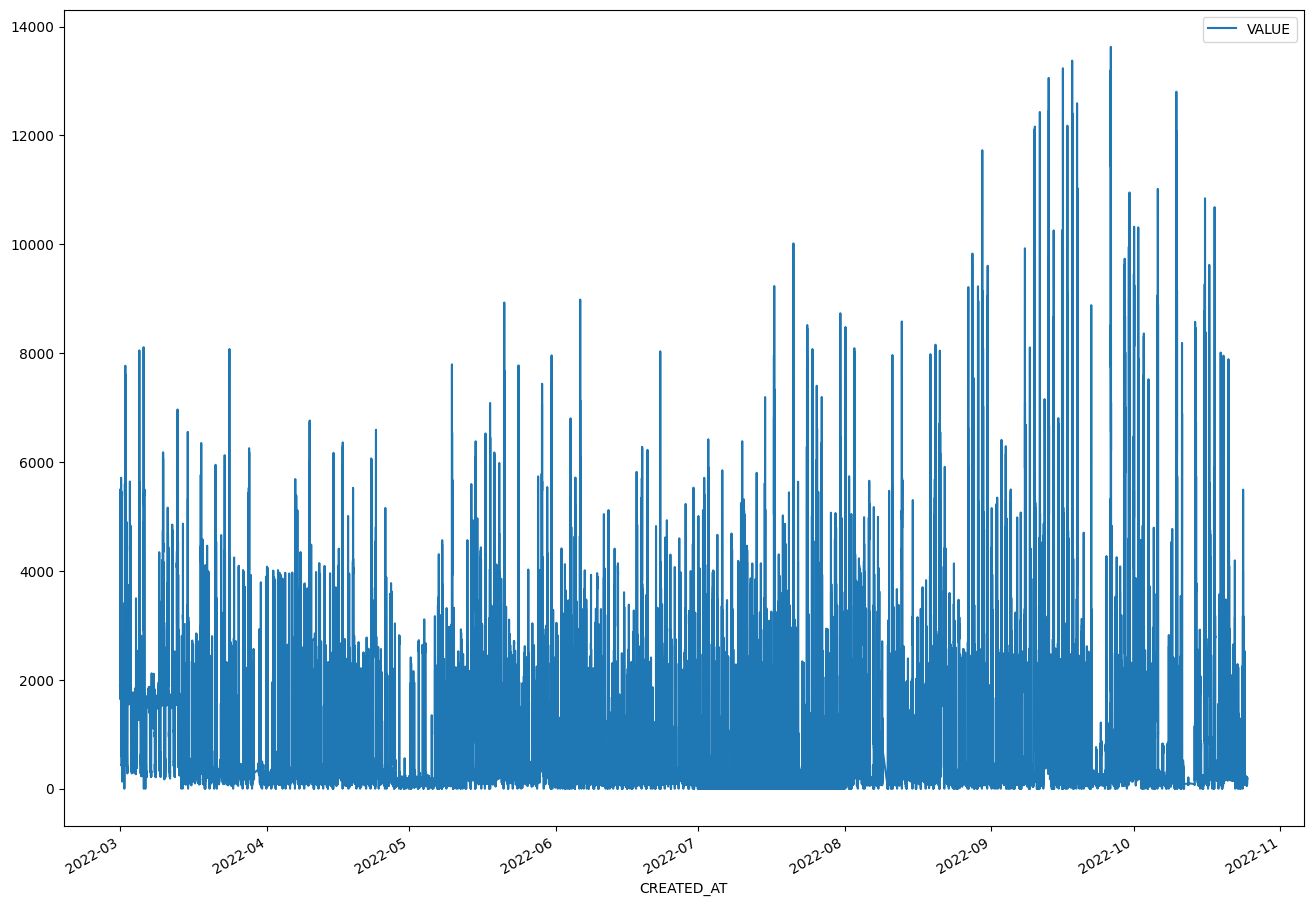

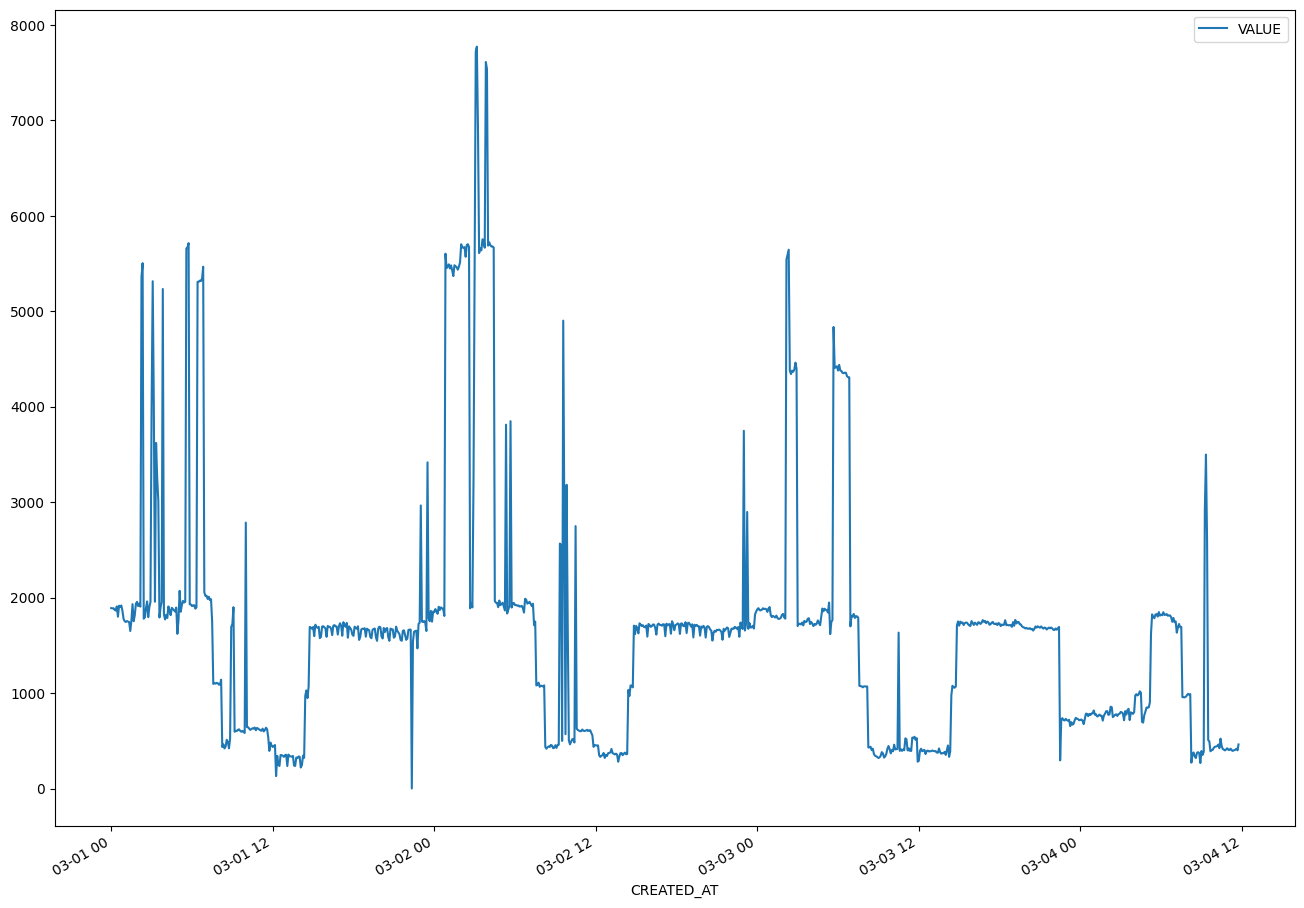

In [8]:
plot_cols = ['VALUE']
date_time = df['CREATED_AT']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:1000]
plot_features.index = date_time[:1000]
_ = plot_features.plot(subplots=True)

In [9]:
dups = df.loc[df.CREATED_AT.duplicated(keep=False)]
dups

,CREATED_AT,VALUE
5788,2022-03-21 10:56:00+00:00,3497.515625
5789,2022-03-21 10:56:00+00:00,2440.597900
6350,2022-03-23 10:51:00+00:00,191.620697
6351,2022-03-23 10:51:00+00:00,188.738434
11075,2022-04-09 20:31:00+00:00,188.511597
...,...,...
71330,2022-10-08 10:56:00+00:00,451.565216
74363,2022-10-21 03:11:00+00:00,1449.125000
74364,2022-10-21 03:11:00+00:00,1469.895508
74457,2022-10-21 11:06:00+00:00,172.149277


Most of these are coming from july

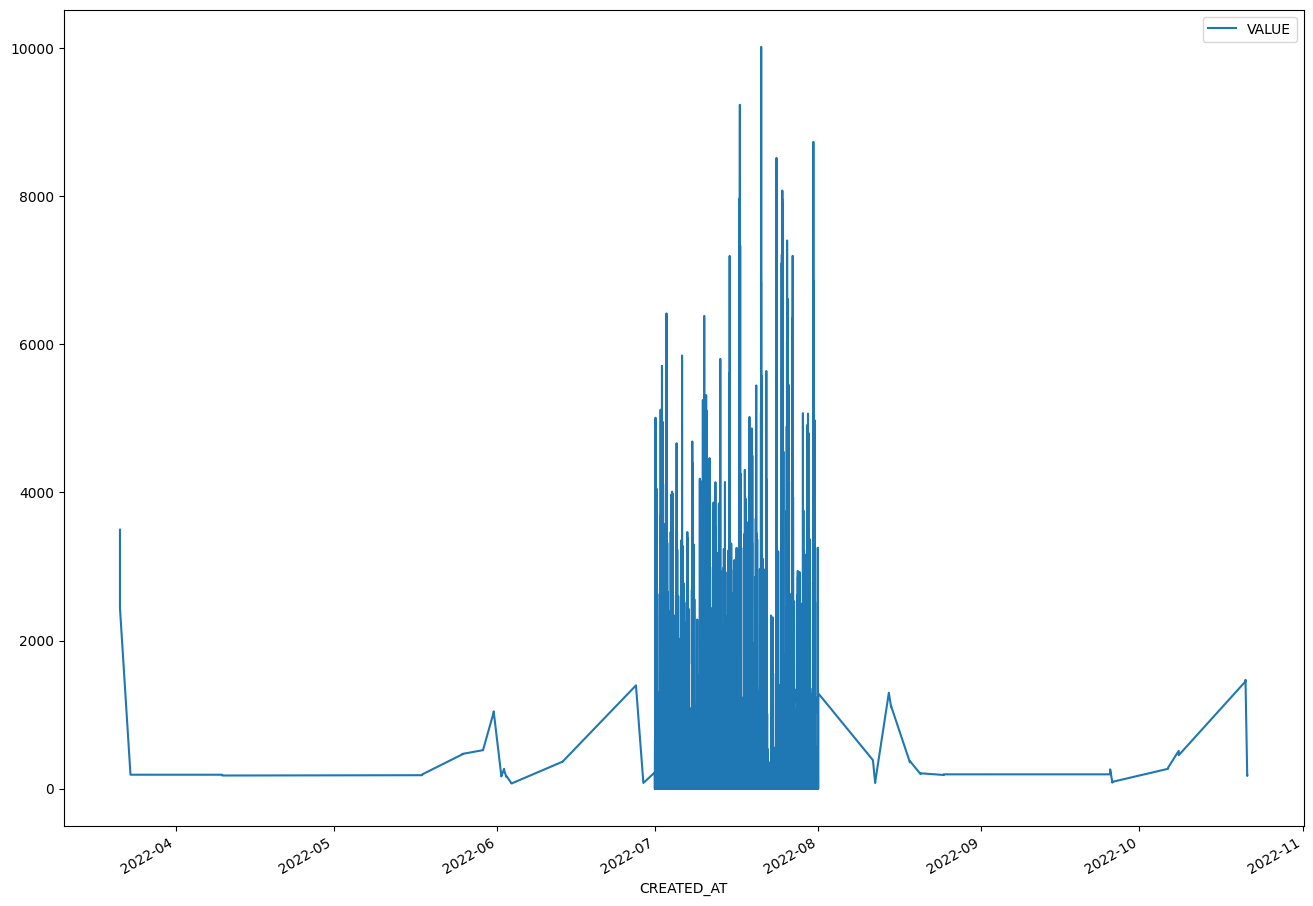

In [10]:
plot_cols = ['VALUE']
date_time = dups['CREATED_AT']
plot_features = dups[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

What happens if I only take the mean of these duplicates?

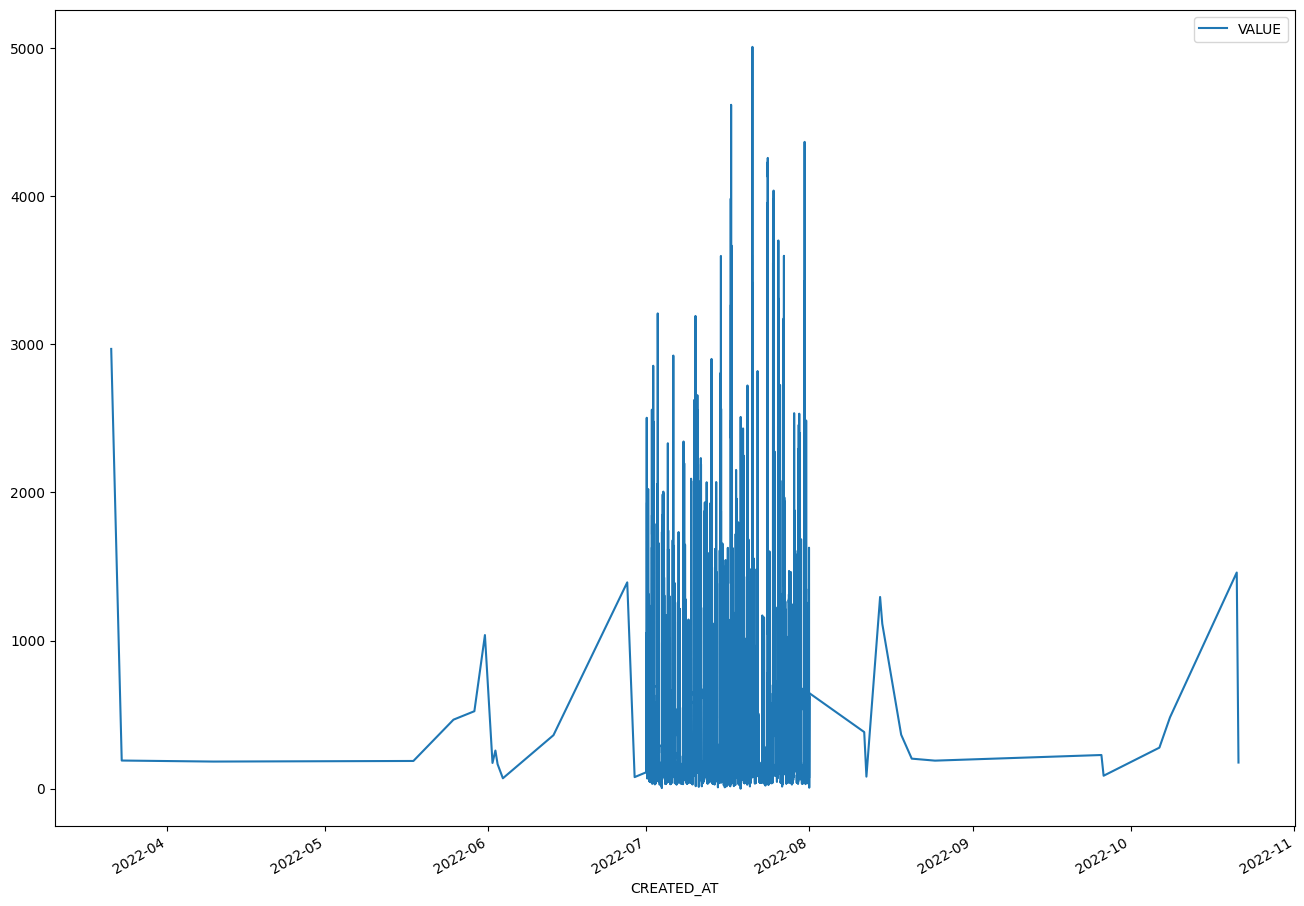

In [11]:
dups_mean = dups.groupby('CREATED_AT').mean()
plot_cols = ['VALUE']
date_time = dups_mean.index
plot_features = dups_mean[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [12]:
dup_describe = dups.groupby('CREATED_AT').describe()

In [13]:
dup_describe

VALUE                                        \
                          count         mean         std          min   
CREATED_AT                                                              
2022-03-21 10:56:00+00:00   2.0  2969.056763  747.353691  2440.597900   
2022-03-23 10:51:00+00:00   2.0   190.179565    2.038068   188.738434   
2022-04-09 20:31:00+00:00   2.0   183.255798    7.432821   178.000000   
2022-05-17 19:46:00+00:00   2.0   187.275162    7.100718   182.254196   
2022-05-25 10:26:00+00:00   2.0   466.143509    4.445593   463.000000   
...                         ...          ...         ...          ...   
2022-09-25 20:36:00+00:00   2.0    87.567726    6.917219    82.676514   
2022-10-06 10:46:00+00:00   2.0   277.245499   11.659472   269.001007   
2022-10-08 10:56:00+00:00   2.0   481.407684   42.203623   451.565216   
2022-10-21 03:11:00+00:00   2.0  1459.510254   14.686967  1449.125000   
2022-10-21 11:06:00+00:00   2.0   176.574638    6.258406   172.149277   

                                                                               
                                   25%          50%          75%          max  
CREATED_AT                                                                     
2022-03-21 10:56:00+00:00  2704.827331  2969.056763  3233.286194  3497.515625  
2022-03-23 10:51:00+00:00   189.459000   190.179565   190.900131   191.620697  
2022-04-09 20:31:00+00:00   180.627899   183.255798   185.883698   188.511597  
2022-05-17 19:46:00+00:00   184.764679   187.275162   189.785645   192.296127  
2022-05-25 10:26:00+00:00   464.571754   466.143509   467.715263   469.287018  
...                                ...          ...          ...          ...  
2022-09-25 20:36:00+00:00    85.122120    87.567726    90.013332    92.458939  
2022-10-06 10:46:00+00:00   273.123253   277.245499   281.367744   285.489990  
2022-10-08 10:56:00+00:00   466.486450   481.407684   496.328918   511.250153  
2022-10-21 03:11:00+00:00  1454.317627  1459.510254  1464.702881  1469.895508  
2022-10-21 11:06:00+00:00   174.361958   176.574638   178.787319   181.000000  

[8498 rows x 8 columns]

<AxesSubplot: xlabel='CREATED_AT'>

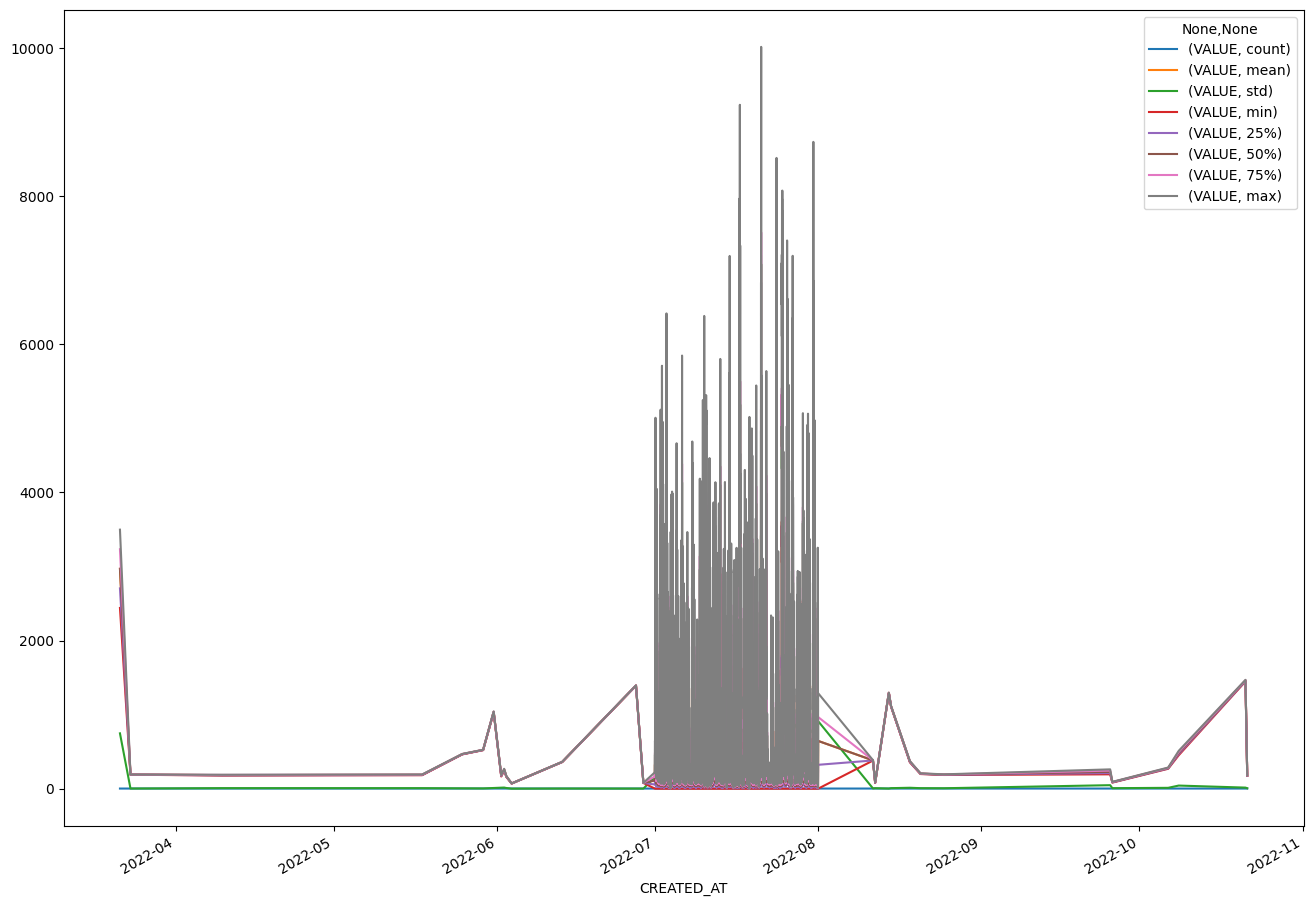

In [14]:
dup_describe.plot()

<AxesSubplot: xlabel='CREATED_AT'>

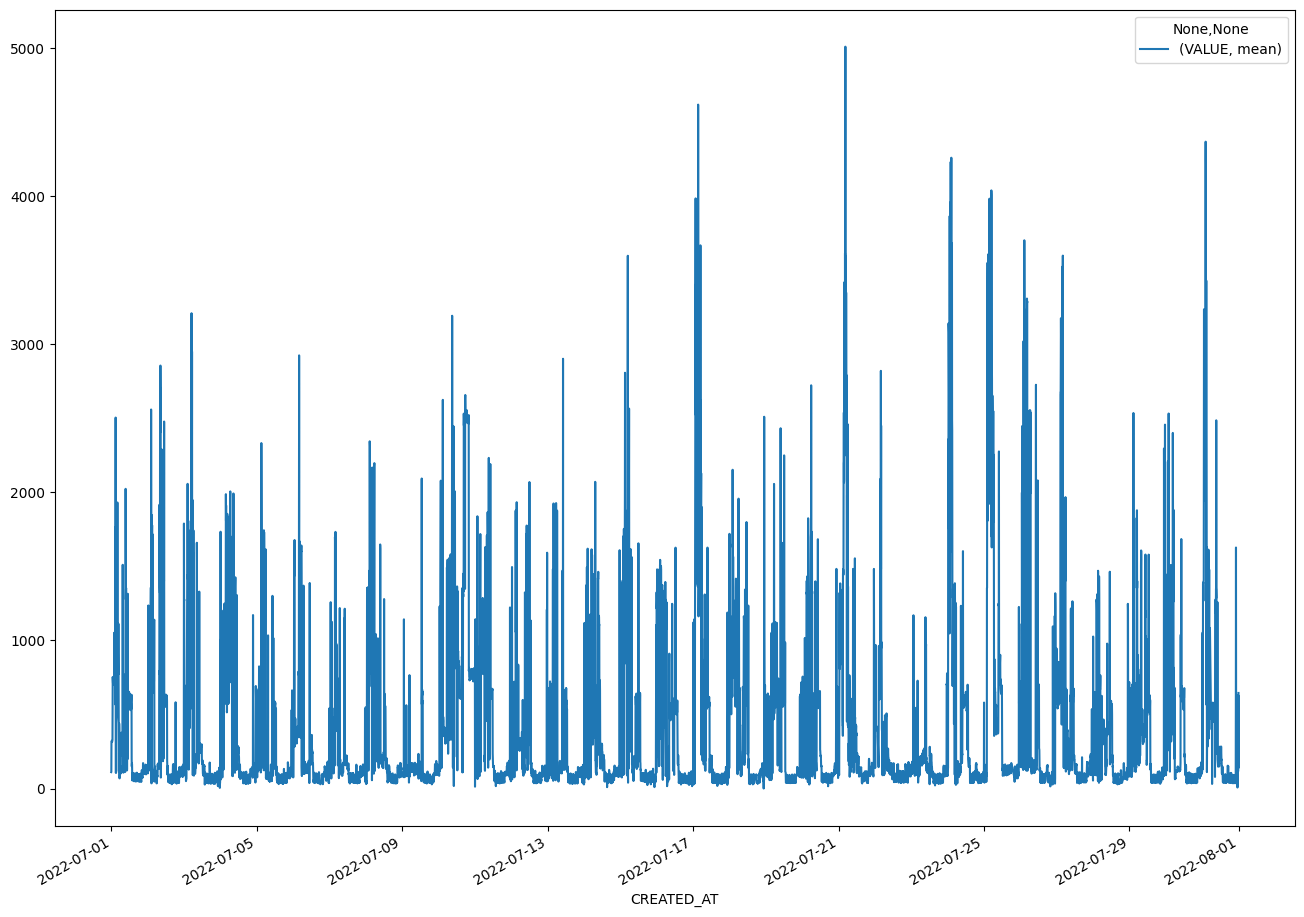

In [15]:
dup_describe.loc[(dup_describe.index < '2022-08-01') & (dup_describe.index > '2022-07-01')][[('VALUE',  'mean')]].plot()

<AxesSubplot: xlabel='CREATED_AT'>

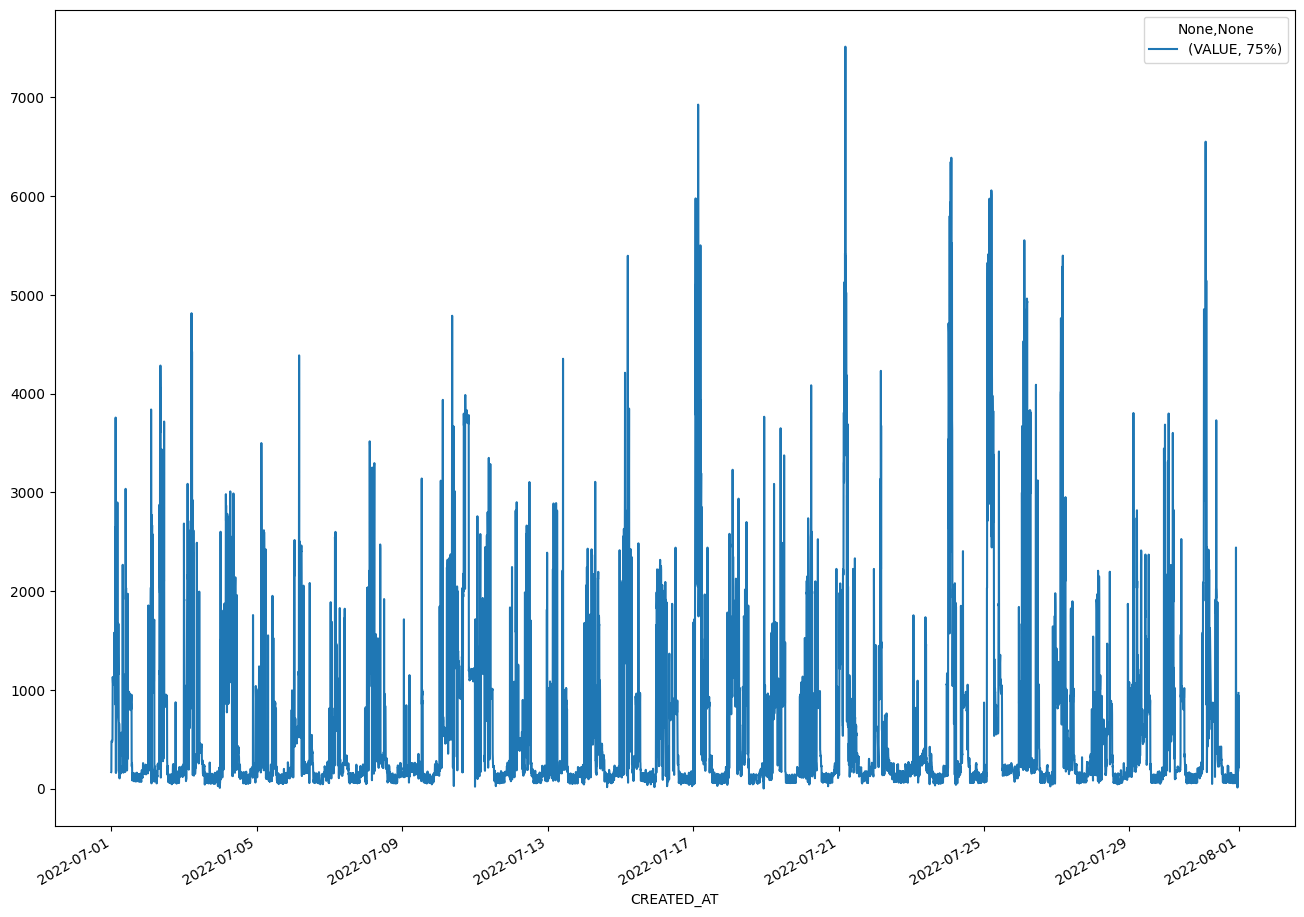

In [16]:
dup_describe.loc[(dup_describe.index < '2022-08-01') & (dup_describe.index > '2022-07-01')][[('VALUE',  '75%')]].plot()

In [17]:
print(df.VALUE.skew())
print(dups.VALUE.skew())
print(dups_mean.VALUE.skew())
print(df.groupby('CREATED_AT').mean().VALUE.skew())

3.425416843002058
3.681620248038244
2.567252974320409
3.4735420698224857


In [18]:
print(dups.describe())
print(dups_mean.describe())

              VALUE
count  17003.000000
mean     424.617796
std      954.081515
min        0.000000
25%        0.000000
50%       57.554832
75%      275.181442
max    10016.287110
             VALUE
count  8498.000000
mean    424.724628
std     605.147618
min       0.091957
25%      84.243959
50%     137.500000
75%     585.444306
max    5008.143555


## Removing date time duplicates

- grouping by mean and removing duplicates seems like a reasonable approach
  - as both skew and std are going down for duplicate rows
  - doesn't seem to affect the overall distribution of the data much (even though mean slightly shifts up & std goes slightly down)

In [19]:
print(df.describe())
print(df.groupby('CREATED_AT').mean().describe())

              VALUE
count  75478.000000
mean     691.535055
std     1218.762616
min        0.000000
25%       94.903437
50%      212.780182
75%      552.517746
max    13626.940430
              VALUE
count  66973.000000
mean     725.444827
std     1216.217415
min        0.000000
25%      131.560028
50%      236.019119
75%      668.066772
max    13626.940430


In [20]:
df = df.groupby('CREATED_AT').mean(numeric_only=True)
df

,VALUE
CREATED_AT,
2022-03-01 00:01:00+00:00,1889.741211
2022-03-01 00:06:00+00:00,1886.260742
2022-03-01 00:11:00+00:00,1888.308594
2022-03-01 00:16:00+00:00,1873.037109
2022-03-01 00:21:00+00:00,1863.653320
...,...
2022-10-24 23:36:00+00:00,118.231399
2022-10-24 23:41:00+00:00,194.981689
2022-10-24 23:46:00+00:00,191.545715


## Time Series Resampling

Time series data is not continuous
- about 1571 data points are missing

In [21]:
expected = pd.Series(data=pd.date_range(start=df.index.min(), end=df.index.max(), freq='5min'))
len(expected) - len(df)

1571

these are the missing data points
- looks like it is not even spaced either

In [22]:
mask1 = expected.isin(df.index)
expected[~mask1]

348     2022-03-02 05:01:00+00:00
448     2022-03-02 13:21:00+00:00
552     2022-03-02 22:01:00+00:00
633     2022-03-03 04:46:00+00:00
700     2022-03-03 10:21:00+00:00
                   ...           
68399   2022-10-24 11:56:00+00:00
68400   2022-10-24 12:01:00+00:00
68401   2022-10-24 12:06:00+00:00
68402   2022-10-24 12:11:00+00:00
68403   2022-10-24 12:16:00+00:00
Length: 5613, dtype: datetime64[ns, UTC]

In [23]:
mask2 = df.index.isin(expected)
df[~mask2]

,VALUE
CREATED_AT,
2022-03-02 11:24:00+00:00,614.000000
2022-03-03 11:19:00+00:00,394.796845
2022-03-03 11:22:00+00:00,416.645386
2022-03-03 11:27:00+00:00,392.571899
2022-03-03 11:32:00+00:00,533.660400
...,...
2022-10-24 11:57:00+00:00,332.553772
2022-10-24 12:02:00+00:00,247.582519
2022-10-24 12:07:00+00:00,223.436859


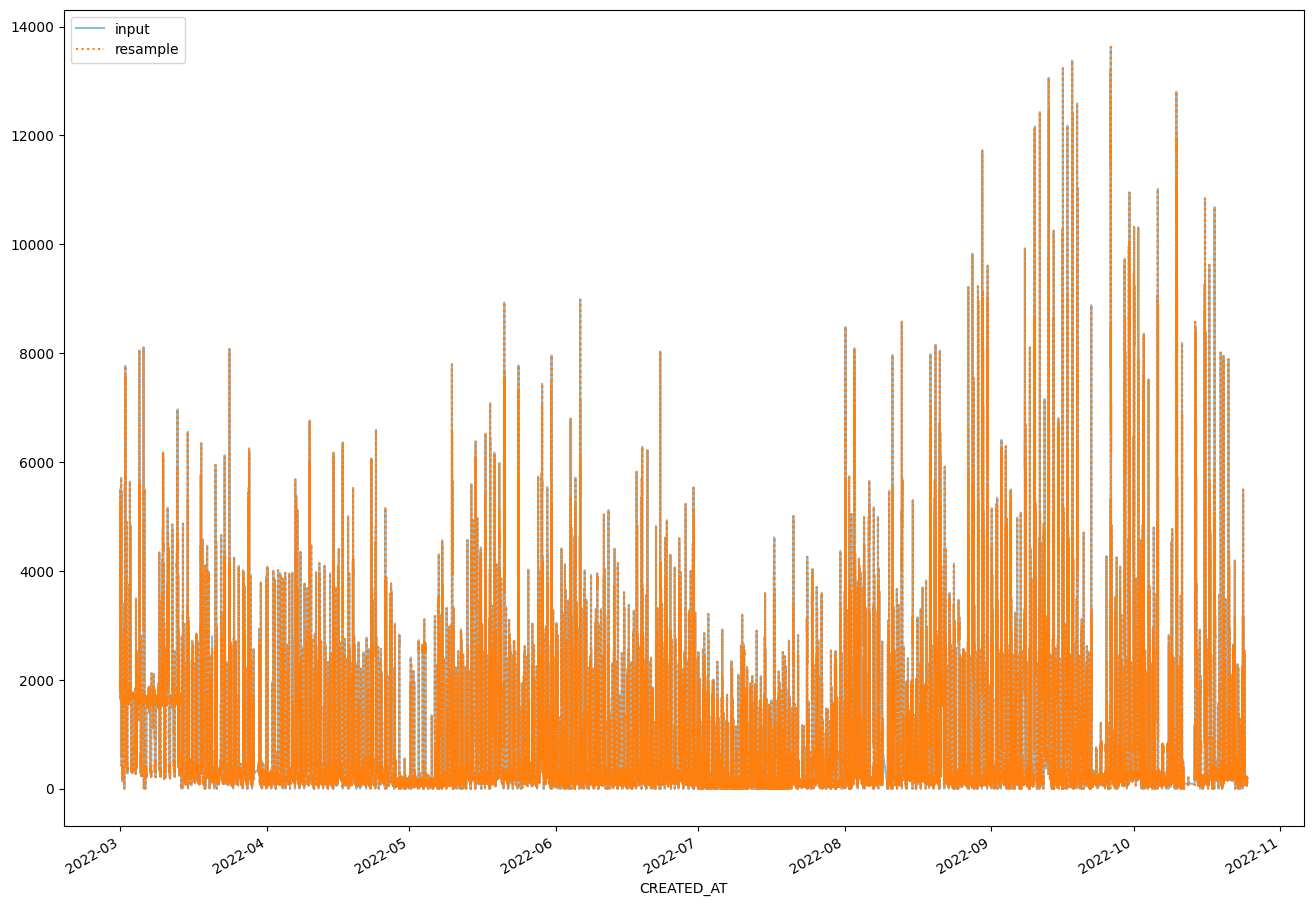

In [24]:
ax = df.plot(alpha=0.5, style='-')
df.resample('5min').mean().plot(style=':', ax=ax)
# df.asfreq('5min').plot(style='--', ax=ax)
plt.legend(['input', 'resample'],
           loc='upper left')

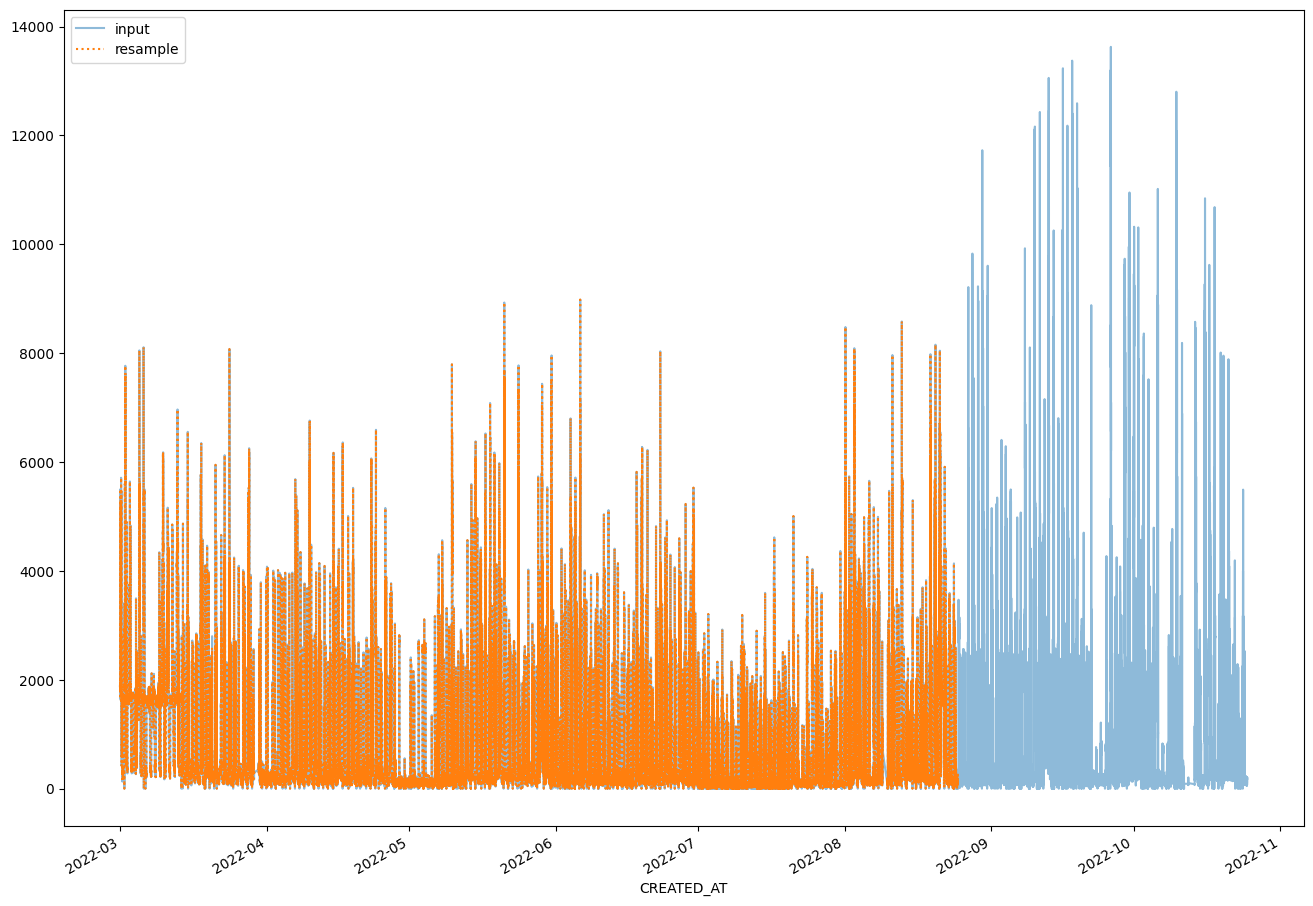

In [25]:
ax = df[:100000].plot(alpha=0.5, style='-')
df[:50000].resample('5min').mean().plot(style=':', ax=ax)
# df.asfreq('5min').plot(style='--', ax=ax)
plt.legend(['input', 'resample'],
           loc='upper left')

In [26]:
df.describe()

,VALUE
count,66973.000000
mean,725.444827
std,1216.217415
min,0.000000
25%,131.560028
50%,236.019119
75%,668.066772
max,13626.940430


In [27]:
df.resample('5min').mean().describe()

,VALUE
count,66719.000000
mean,726.524982
std,1217.678911
min,0.000000
25%,131.740890
50%,236.112656
75%,670.153107
max,13626.940430


In [28]:
df.resample('5min').sum().describe()

,VALUE
count,68544.000000
mean,708.817933
std,1208.530959
min,0.000000
25%,116.264786
50%,226.934113
75%,634.622833
max,13626.940430


resampling by sum every 5min as it makes more sense to add power consumption in those bins than averaging it

In [29]:
df = df.resample('5min').sum()

In [30]:
expected

0       2022-03-01 00:01:00+00:00
1       2022-03-01 00:06:00+00:00
2       2022-03-01 00:11:00+00:00
3       2022-03-01 00:16:00+00:00
4       2022-03-01 00:21:00+00:00
                   ...           
68539   2022-10-24 23:36:00+00:00
68540   2022-10-24 23:41:00+00:00
68541   2022-10-24 23:46:00+00:00
68542   2022-10-24 23:51:00+00:00
68543   2022-10-24 23:56:00+00:00
Length: 68544, dtype: datetime64[ns, UTC]

In [31]:
mask = expected.isin(df.index)
expected[~mask]

0       2022-03-01 00:01:00+00:00
1       2022-03-01 00:06:00+00:00
2       2022-03-01 00:11:00+00:00
3       2022-03-01 00:16:00+00:00
4       2022-03-01 00:21:00+00:00
                   ...           
68539   2022-10-24 23:36:00+00:00
68540   2022-10-24 23:41:00+00:00
68541   2022-10-24 23:46:00+00:00
68542   2022-10-24 23:51:00+00:00
68543   2022-10-24 23:56:00+00:00
Length: 68544, dtype: datetime64[ns, UTC]

In [32]:
df.isna().sum()

VALUE    0
dtype: int64

In [33]:
df.reset_index(inplace=True)

In [34]:
df

,CREATED_AT,VALUE
0,2022-03-01 00:00:00+00:00,1889.741211
1,2022-03-01 00:05:00+00:00,1886.260742
2,2022-03-01 00:10:00+00:00,1888.308594
3,2022-03-01 00:15:00+00:00,1873.037109
4,2022-03-01 00:20:00+00:00,1863.653320
...,...,...
68539,2022-10-24 23:35:00+00:00,118.231399
68540,2022-10-24 23:40:00+00:00,194.981689
68541,2022-10-24 23:45:00+00:00,191.545715
68542,2022-10-24 23:50:00+00:00,208.008789


## Time Frequency Analysis
finding the right frequency for the data with fft to model time 

In [35]:
fft = tf.signal.rfft(df['VALUE'])
f_per_dataset = np.arange(0, len(fft))
n_samples_fivemin = len(df['VALUE'])
fivemin_per_day = 24*60/5
days_per_dataset = n_samples_fivemin/(fivemin_per_day)
f_per_day = f_per_dataset/days_per_dataset # sampling frequency

2022-11-08 22:51:40.596582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


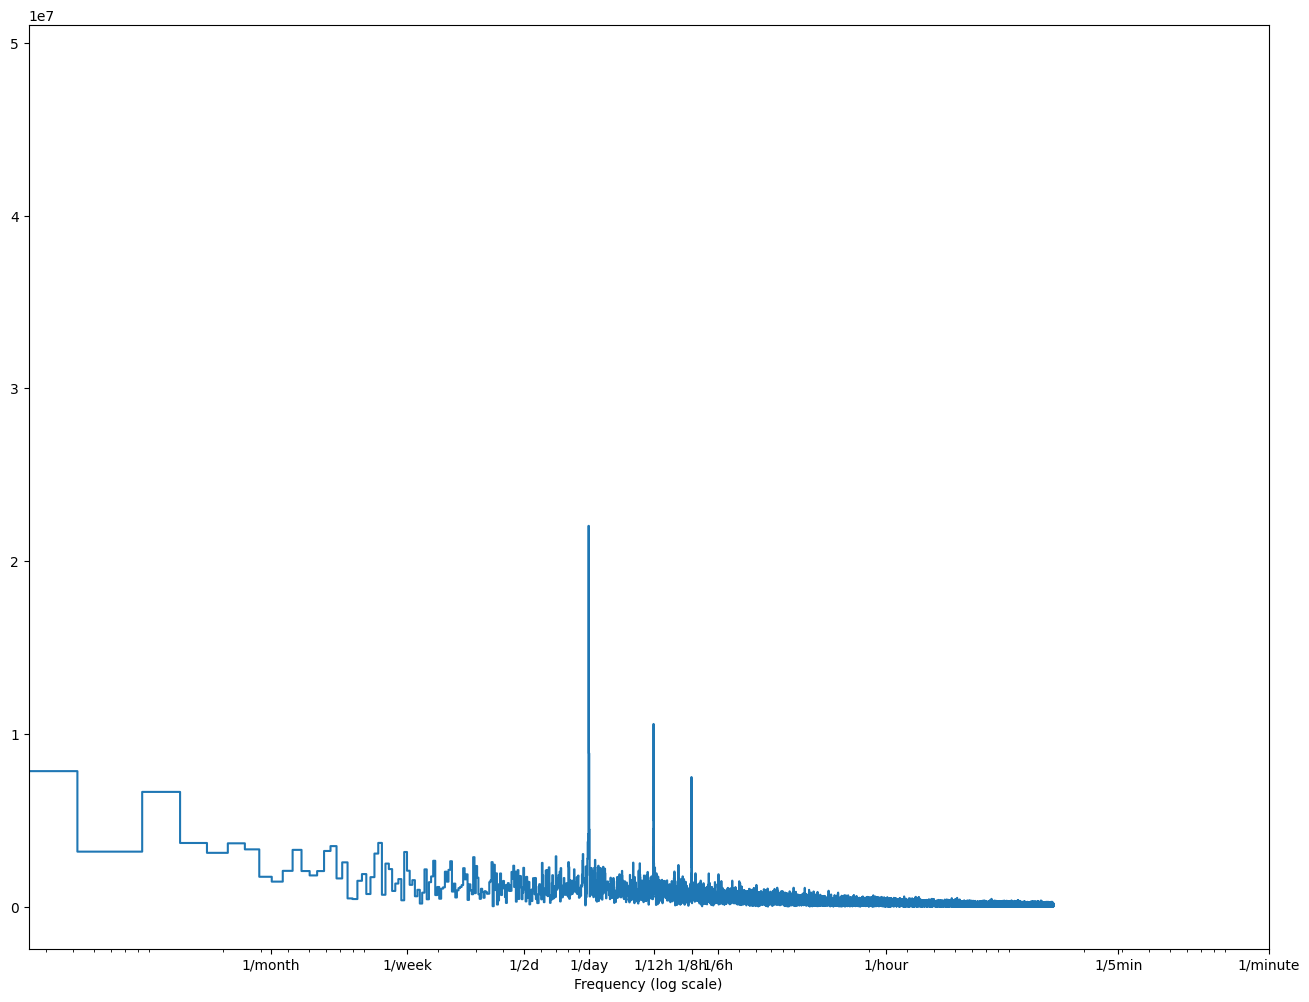

In [36]:
plt.step(f_per_day, np.abs(fft))
plt.xscale('log')
# plt.ylim(0, 100000000)
# plt.xlim([0.01, max(plt.xlim())])
plt.xticks([1/30,1/7, 1/2, 1, 24/12, 24/8, 24/6, 24, 24*60/5, 24*60],labels=['1/month', '1/week','1/2d','1/day', '1/12h', '1/8h', '1/6h', '1/hour', '1/5min', '1/minute'])
_ = plt.xlabel('Frequency (log scale)')

### Modelling time
- 1 day is a good frequency to model time
- 1 hours is a good frequency too as there are spikes around every 12hrs, 8hrs or so

In [37]:
df

,CREATED_AT,VALUE
0,2022-03-01 00:00:00+00:00,1889.741211
1,2022-03-01 00:05:00+00:00,1886.260742
2,2022-03-01 00:10:00+00:00,1888.308594
3,2022-03-01 00:15:00+00:00,1873.037109
4,2022-03-01 00:20:00+00:00,1863.653320
...,...,...
68539,2022-10-24 23:35:00+00:00,118.231399
68540,2022-10-24 23:40:00+00:00,194.981689
68541,2022-10-24 23:45:00+00:00,191.545715
68542,2022-10-24 23:50:00+00:00,208.008789


In [39]:
date_time = df.pop('CREATED_AT')

In [40]:
date_time

0       2022-03-01 00:00:00+00:00
1       2022-03-01 00:05:00+00:00
2       2022-03-01 00:10:00+00:00
3       2022-03-01 00:15:00+00:00
4       2022-03-01 00:20:00+00:00
                   ...           
68539   2022-10-24 23:35:00+00:00
68540   2022-10-24 23:40:00+00:00
68541   2022-10-24 23:45:00+00:00
68542   2022-10-24 23:50:00+00:00
68543   2022-10-24 23:55:00+00:00
Name: CREATED_AT, Length: 68544, dtype: datetime64[ns, UTC]

In [41]:
df

,VALUE
0,1889.741211
1,1886.260742
2,1888.308594
3,1873.037109
4,1863.653320
...,...
68539,118.231399
68540,194.981689
68541,191.545715
68542,208.008789


In [42]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

0        1.646093e+09
1        1.646093e+09
2        1.646093e+09
3        1.646094e+09
4        1.646094e+09
             ...     
68539    1.666654e+09
68540    1.666655e+09
68541    1.666655e+09
68542    1.666655e+09
68543    1.666656e+09
Name: CREATED_AT, Length: 68544, dtype: float64

Usable signals by using sine and cosine transforms to clear "Time of day" and "Time of hour" signals:

In [43]:
day = 24*60*60
hour = 60*60

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
df['Hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))

In [44]:
df

,VALUE,Day sin,Day cos,Hour sin,Hour cos
0,1889.741211,-2.421079e-12,1.000000,-5.810590e-11,1.000000e+00
1,1886.260742,2.181489e-02,0.999762,5.000000e-01,8.660254e-01
2,1888.308594,4.361939e-02,0.999048,8.660254e-01,5.000000e-01
3,1873.037109,6.540313e-02,0.997859,1.000000e+00,1.188769e-10
4,1863.653320,8.715574e-02,0.996195,8.660254e-01,-5.000000e-01
...,...,...,...,...,...
68539,118.231399,-1.088669e-01,0.994056,-5.000000e-01,-8.660254e-01
68540,194.981689,-8.715574e-02,0.996195,-8.660254e-01,-5.000000e-01
68541,191.545715,-6.540313e-02,0.997859,-1.000000e+00,1.087001e-10
68542,208.008789,-4.361939e-02,0.999048,-8.660254e-01,5.000000e-01


Text(0.5, 1.0, 'Time of day signal')

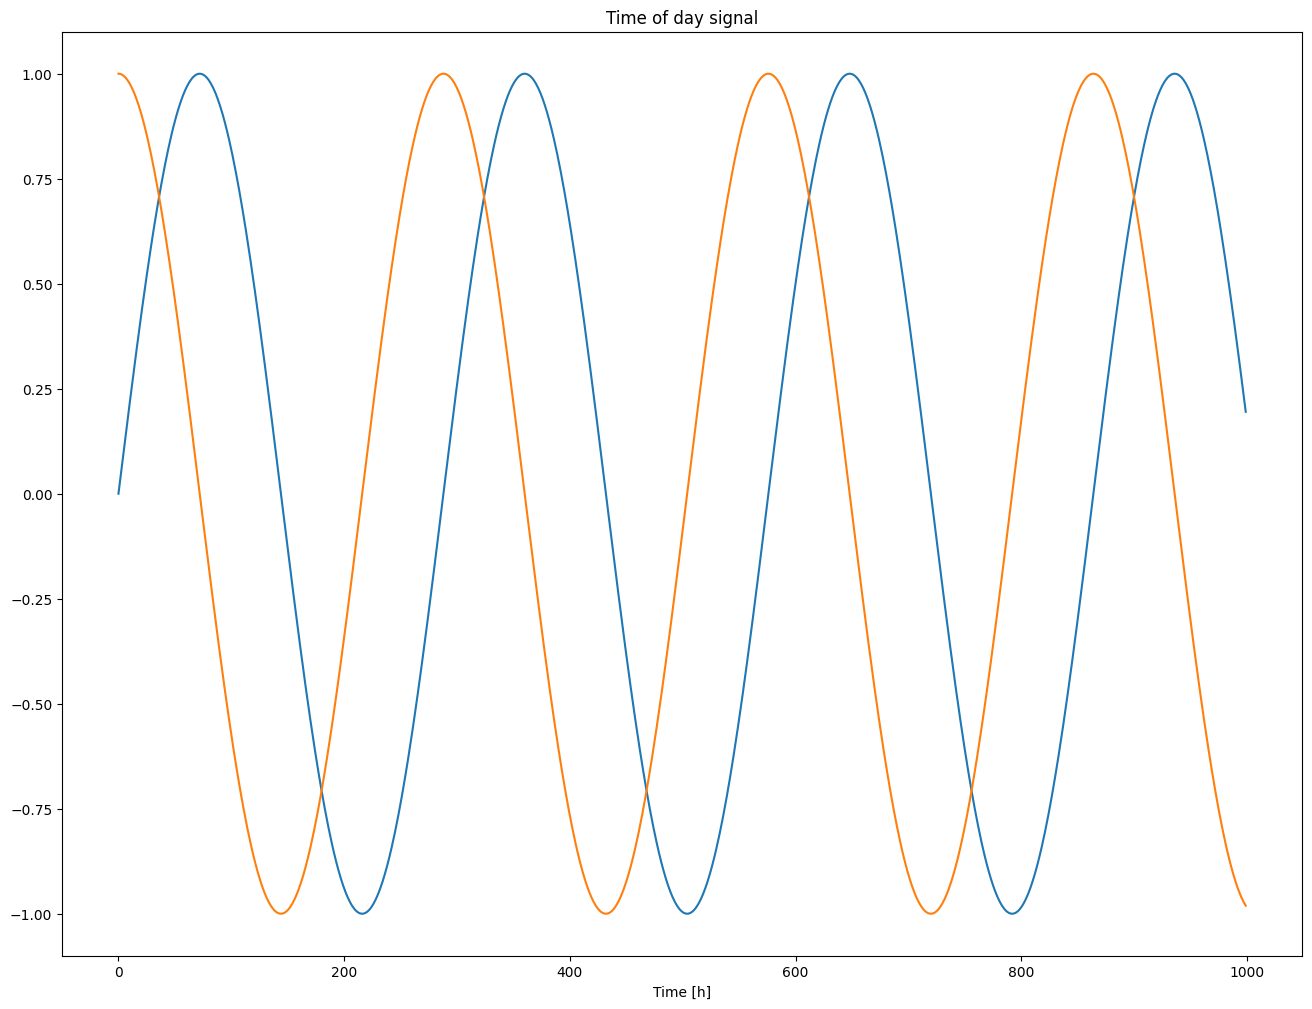

In [47]:
plt.plot(np.array(df['Day sin'])[:1000])
plt.plot(np.array(df['Day cos'])[:1000])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of day signal')

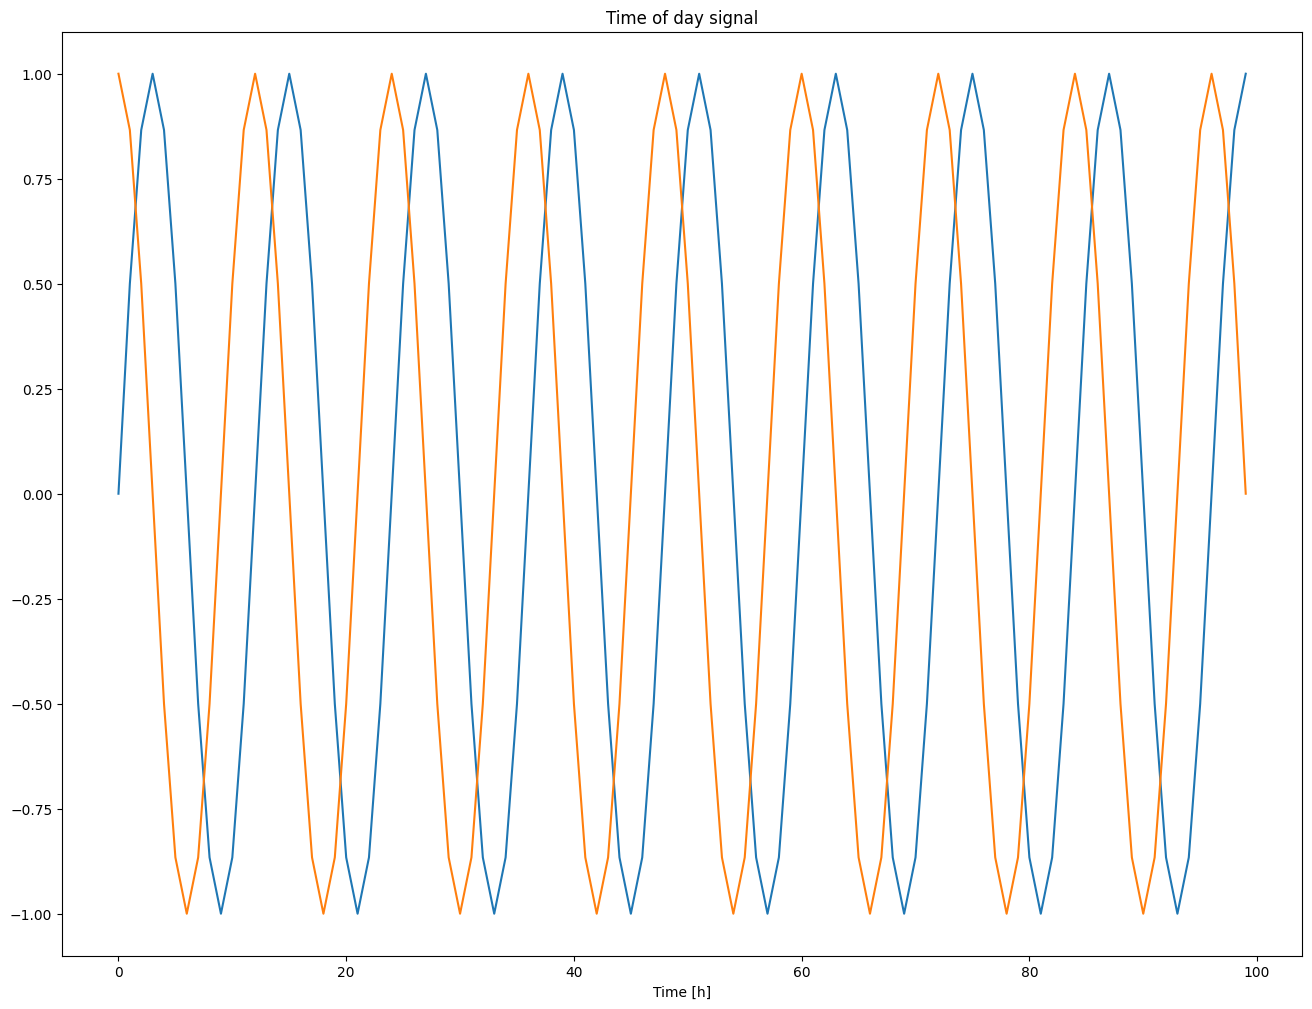

In [50]:
plt.plot(np.array(df['Hour sin'])[:100])
plt.plot(np.array(df['Hour cos'])[:100])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

### Data Splitting
70, 20, 10 split

In [51]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [52]:
train_df.info

<bound method DataFrame.info of              VALUE       Day sin   Day cos      Hour sin      Hour cos
0      1889.741211 -2.421079e-12  1.000000 -5.810590e-11  1.000000e+00
1      1886.260742  2.181489e-02  0.999762  5.000000e-01  8.660254e-01
2      1888.308594  4.361939e-02  0.999048  8.660254e-01  5.000000e-01
3      1873.037109  6.540313e-02  0.997859  1.000000e+00  1.188769e-10
4      1863.653320  8.715574e-02  0.996195  8.660254e-01 -5.000000e-01
...            ...           ...       ...           ...           ...
47975  1158.696533 -4.809888e-01 -0.876727 -5.000000e-01  8.660254e-01
47976  1152.094727 -5.000000e-01 -0.866025 -7.291229e-11  1.000000e+00
47977  1174.975830 -5.187733e-01 -0.854912  5.000000e-01  8.660254e-01
47978  1151.017578 -5.372996e-01 -0.843391  8.660254e-01  5.000000e-01
47979  1120.389038 -5.555702e-01 -0.831470  1.000000e+00  1.336833e-10

[47980 rows x 5 columns]>

In [53]:
val_df.info

<bound method DataFrame.info of              VALUE   Day sin   Day cos      Hour sin  Hour cos
47980  1141.104614 -0.573576 -0.819152  8.660254e-01 -0.500000
47981  1134.685425 -0.591310 -0.806445  5.000000e-01 -0.866025
47982  1166.899292 -0.608761 -0.793353  1.944543e-10 -1.000000
47983  1160.720337 -0.625923 -0.779884 -5.000000e-01 -0.866025
47984  1143.107910 -0.642788 -0.766044 -8.660254e-01 -0.500000
...            ...       ...       ...           ...       ...
61684  1208.937012  0.906308  0.422618  8.660254e-01 -0.500000
61685  1206.675049  0.915311  0.402747  5.000000e-01 -0.866025
61686  1209.634888  0.923880  0.382683 -2.033831e-10 -1.000000
61687  1224.948853  0.932008  0.362438 -5.000000e-01 -0.866025
61688  1194.510132  0.939693  0.342020 -8.660254e-01 -0.500000

[13709 rows x 5 columns]>

In [54]:
test_df.info

<bound method DataFrame.info of              VALUE   Day sin   Day cos      Hour sin      Hour cos
61689  1348.115723  0.946930  0.321439 -1.000000e+00  1.426121e-10
61690  1324.650146  0.953717  0.300706 -8.660254e-01  5.000000e-01
61691  1316.081299  0.960050  0.279829 -5.000000e-01  8.660254e-01
61692  1321.769287  0.965926  0.258819  8.184108e-11  1.000000e+00
61693  1823.218506  0.971342  0.237686  5.000000e-01  8.660254e-01
...            ...       ...       ...           ...           ...
68539   118.231399 -0.108867  0.994056 -5.000000e-01 -8.660254e-01
68540   194.981689 -0.087156  0.996195 -8.660254e-01 -5.000000e-01
68541   191.545715 -0.065403  0.997859 -1.000000e+00  1.087001e-10
68542   208.008789 -0.043619  0.999048 -8.660254e-01  5.000000e-01
68543   181.538818 -0.021815  0.999762 -5.000000e-01  8.660254e-01

[6855 rows x 5 columns]>

### Normalising data


mean, std are computed only on training data and are used to noramlise (f-mean)/std on train, val, test data
 - as we don't want to leak any information from val or test data
 - and because we don't have access to future metrics

In [55]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

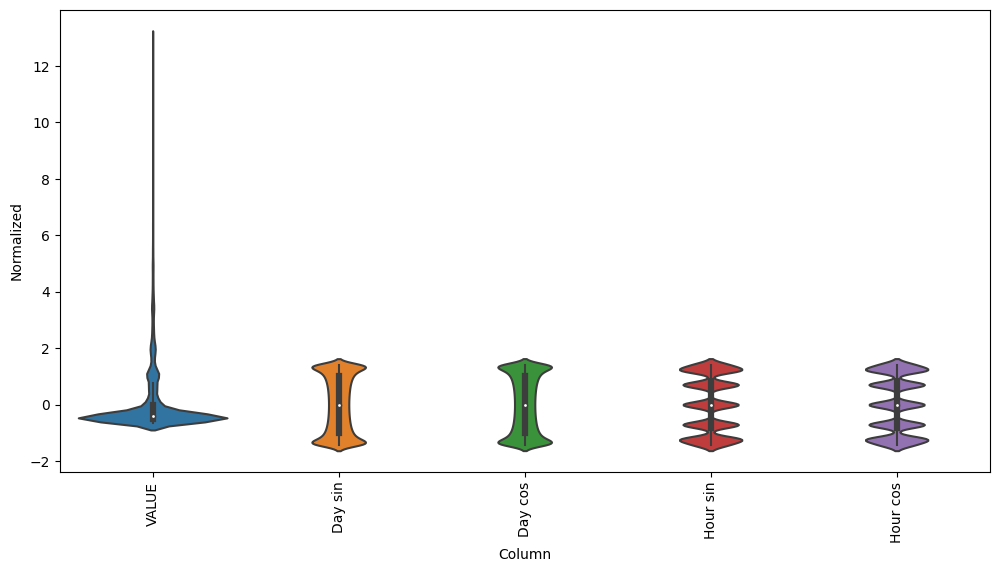

In [56]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)